In [12]:
import matplotlib
import os
from shubow_tools import *
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
path = r'/media/spl/D/MicroCT_data/4th batch bone mets loading study/Reconstruction week 0/418 week 0 _Rec'
imgs = imreadseq_multithread(path, sitkimg = False)

In [4]:
import sys
print('File size is : {:4.1f} Mbs'.format(sys.getsizeof(imgs)/1024/1024))

File size is : 5918.0 Mbs


In [5]:
print(imgs.shape)
print('Width(x-axis) is :{}'.format(imgs.shape[2]))
print('Height(y-axis) is :{}'.format(imgs.shape[1]))
print('Depth(z-axis) is :{}'.format(imgs.shape[0]))

(2610, 948, 2508)
Width(x-axis) is :2508
Height(y-axis) is :948
Depth(z-axis) is :2610


In [13]:
interact_display(imgs)

interactive(children=(IntSlider(value=1304, description='img_z_1', max=2609), Output()), _dom_classes=('widget…

In [16]:
x_mid = int(imgs.shape[2]/2)

left = imgs[:,:,:x_mid]
#right = imgs[:,:,x_mid:]

del imgs
interact_display(left)

interactive(children=(IntSlider(value=1304, description='img_z_1', max=2609), Output()), _dom_classes=('widget…

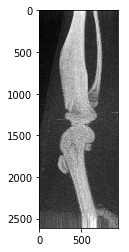

In [20]:
x_project = left.max(axis = 2)
plt.imshow(x_project,cmap=plt.get_cmap('gray'))

1357


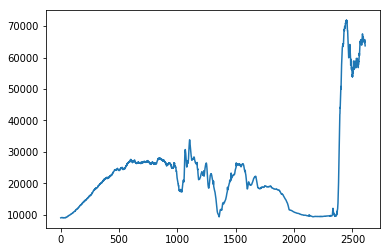

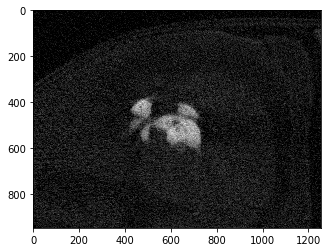

In [26]:
momentum = []
for i in left:
    momentum.append(np.std(np.vstack(np.nonzero(i>100)), axis = 1))
    
#momentum = [np.std(np.vstack(np.nonzero(i>100)), axis = 1) for i in left]    

momentum = np.array(list(map(lambda x:x[0]**2+x[1]**2,momentum)))

plt.figure()
plt.plot(index)

z_index = np.argsort(index[1200:1700])[0]+1200

print(z_index)
plt.figure()
plt.imshow(left[z_index],cmap=plt.get_cmap('gray'))

In [ ]:
left_tibia = left[:z_index]

left_femur = left[z_index:]

In [29]:
# Image Registration using SimpleITK

ref_image = sitk.ReadImage(r'/media/spl/D/MicroCT_data/4th batch bone mets nii files/418LT_w0.nii')
interact_display(sitk.GetArrayFromImage(ref_image))

interactive(children=(IntSlider(value=150, description='img_z_1', max=300), Output()), _dom_classes=('widget-i…

In [ ]:
# Image Registration using SimpleITK, only pseudo code

# initial transform
inital_transform = sitk.CenteredTransformInitializer()

# registration
img_reg, transform = sitk.xxxx registration method

# resample

img_reg = sitk.Resample() # some resample method

In [ ]:
#imsaveseq(imgs2,os.path.join(path,"shubo_VOI"),"c",sitkimages = False)
sitk.WriteImage(sitk.GetImageFromArray(img_reg), os.path.join(path,"left_tibia.nii.gz"))

In [33]:
ref_image2 = down_scale(ref_image, 4.3)

ref_image2 = sitk.GetArrayFromImage(ref_image2)
interact_display(sitk.GetArrayFromImage(ref_image), ref_image2)

interactive(children=(IntSlider(value=150, description='img_z_1', max=300), IntSlider(value=34, description='i…

In [ ]:
mask = image > threshold

image = mask * image